Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

# Teorema de la probabilidad total y teorema de Bayes

## Teorema de Bayes

**Versión simple**:

Sean $A$ y $B$ dos sucesos, de modo que la probabilidad de $B$ es distinta de cero (0). Entonces, la probabilidad $P(A|B)$ viene dada por la expresión:

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

donde:
* $P(A)$ es la probabilidad de $A$ *"a priori"*, antes de observar $B$.
* $P(B|A)$ es la probabilidad de $B$, si $A$ fuera cierto,
* $P(A|B)$ es la probabilidad de $A$ "*a posteriori*", después de observar $B$..

[Teorema de Bayes en la wikipedia](https://es.wikipedia.org/wiki/Teorema_de_Bayes)

###  Ejercicio 20. 
Un indicador de calentamiento de aceite de un motor está en posición encendido o apagado en función de que se rebase un cierto umbral de temperatura. Se definen los sucesos E: Indicador encendido y T : temperatura umbral del aceite superada.
Se supone que la probabilidad de superar la temperatura umbral es 0,1, la probabilidad de que se encienda el indicador cuando la temperatura umbral se ha superado es 0,99 y la probabilidad de que se encienda el indicador a una temperatura más baja es 0,02.
 - Calcular la probabilidad de que el indicador esté encendido.(sol = 0,1170)
 - Calcular la probabilidad de que la temperatura del aceite sea superior a la umbral cuando el indicador está encendido.(sol = 0,8462)

Se pide:

 - Resuelve el ejercicio a mano usando el teorema de Bayes.
 - Escribe una función que representa el estado del sistema, que es aleatorio: es una función que no recibe argumentos y que devuelve una tupla con dos booleanos 
  `(indicador_encendido, umbral_de_tempreatura_superado)`
 - Escribe filtros para los eventos que aparecen en el enunciado.
 - Estima las probabilidades condicionadas usando la técnica de simulación que aprendimos en el cuaderno anterior
 
$$P(A|B) \approx \frac{\text{elementos de la muestra en } A\cap B}{\text{elementos de la muestra en } B}$$


## Ejercicio 25. (Sept. 2010)

Dos estudiantes A1 y A2 están matriculados en un curso. A1 asiste a las
clases el 80 % de las veces y A2 el 60 %, siendo las asistencias de ambos independientes.
Se pide.

 - b) ¿Cuál es la probabilidad de que exactamente uno y solo uno de los estudiantes se encuentre en clase un dı́a cualquiera?
 - c) ¿cuál es la probabilidad de que cuando eso suceda, sea A1 el estudiante que esté en clase?
 
_Sigue los mismos pasos del ejercicio anterior_

## Teorema de Bayes (versión larga)

Sea $\{A_1, A_2, ..., A_i,   ...,   A_n\}$ un conjunto de sucesos mutuamente excluyentes y exhaustivos, y tales que la probabilidad de cada uno de ellos es distinta de cero. Sea B un suceso cualquiera del que se conocen las probabilidades condicionales $P(B|A_i)$ y tal que $P(B)\neq 0$ . Entonces, la probabilidad $P(A_i|B)$ viene dada por la expresión:

$$P(A_i|B) = \frac{P(B|A_i) P(A_i)}{P(B|A_{1})P(A_{1})+\ldots +P(B|A_{n})P(A_{n})}$$

donde:
 - $P(A_j)$ es la probabilidad de $A_j$ _"a priori"_, antes de observar $B$.
 - $P(B|A_j)$ es la probabilidad de $B$ si $A_j$ fuera cierto.
 - $P(A_j|B)$ es la probabilidad de $A_j$ _"a posteriori"_, después de observar $B$.

[Teorema de Bayes en la wikipedia](https://es.wikipedia.org/wiki/Teorema_de_Bayes)

## Ejercicio 25. (Sept. 2010)

Seis estudiantes A1, A2, ..., A6 están matriculados en un curso. A1 asiste a las
clases el 10% de las veces, A2 el 20%, ... y A6 el 60%, siendo las asistencias de ambos independientes.
Se pide.

 - a) ¿Cuál es la probabilidad de que ninguno de los estudiantes se encuentre en clase un día cualquiera?
 - b) ¿Cuál es la probabilidad de que exactamente uno de los estudiantes se encuentre en clase un día cualquiera?
 - c) ¿cuál es la probabilidad de que cuando eso suceda, sea A6 el estudiante que esté en clase?

 - Resuelve el problema de forma exacta usando el teorema de la probabilidad total y el teorema de Bayes, pero usa el ordenador para hacer los cálculos exactos.
 - Simula el resultado.

In [2]:
M = 6
probs = [i/10 for i in range(1,M+1)]
probs

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

In [10]:
def lista_asistencia(probs):
    '''
    Función aleatoria que devuelve el resultado de simular el experimento *una vez*.
    El resultado es distinto cada vez que llamamos a la función.
    Devuelve una tupla (a_1, ... ,a_n) de booleanos:
     - a_i es True si el alumno A_i ha asistido a clase
    '''
    lista = []
    for p in probs:
        #Es importante generar un número aleatorio independiente *cada vez*
        t = random.random()
        if t < p:
            a_i = True
        else:
            a_i = False
        lista.append(a_i)
    return lista

In [12]:
lista_asistencia(probs)

[False, False, False, False, True, False]

P(asisten 0 alumnos) ~ 0.061
P(asisten 1 alumnos) ~ 0.242
P(asisten 2 alumnos) ~ 0.356
P(asisten 3 alumnos) ~ 0.242
P(asisten 4 alumnos) ~ 0.086
P(asisten 5 alumnos) ~ 0.011
P(asisten 6 alumnos) ~ 0.001


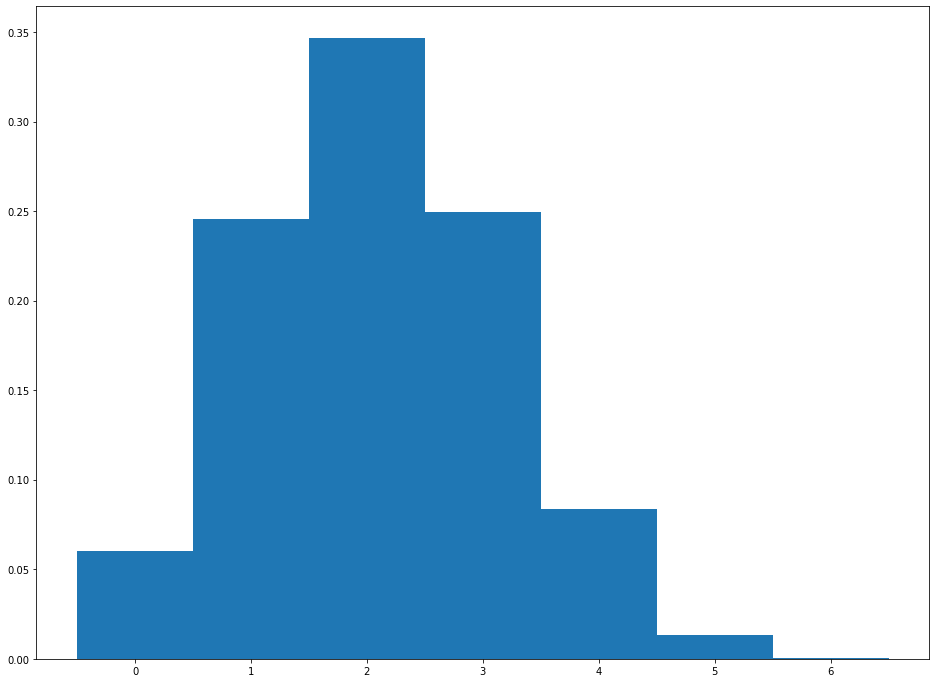

In [7]:
def k_alumnos_en_total(lista, k):
    '''Devuelve True si han venido exactamente k alumnos, False en otro caso
    '''
    #La suma de una lista de booleanos es el número de booleanos que son True
    return sum(lista) == k

#Usamos la misma muestra todo el rato. Si no lo hacemos obtendríamos probabilidades
#que no suman 1
N = 10000
muestra = [lista_asistencia(probs) for _ in range(N)]
#El número de alumnos que podría asistir está entre 0 y N
for k in range(M+1):
    prob_k = sum(k_alumnos_en_total(lista, k) for lista in muestra)/N
    print('P(asisten %d alumnos) ~ %.3f'%(k, prob_k))

#Misma información de forma gráfica:
muestra = [lista_asistencia(probs) for _ in range(N)]

#Nos quedamos sólo con el número de asistentes
numero_asistentes = [sum(lista) for lista in muestra]

plt.figure(figsize=(16,12))
plt.hist(numero_asistentes, density=1, bins=[k+0.5 for k in range(-1,M+1)])
plt.show()

In [14]:
def k_alumnos_en_total_y_alumno_6(lista, k):
    '''Devuelve True si han venido exactamente k alumnos
    y además ha venido el primer alumno,
    False en otro caso
    '''
    #lista[0] es el booleano que representa la asistencia (o no) del primer alumno
    #La suma de una lista de booleanos es el número de booleanos que son True
    return lista[-1] and sum(lista) == k

#Usamos la misma muestra todo el rato. Si no lo hacemos obtendríamos 
#probabilidades que no suman 1
N = 10000
muestra = [lista_asistencia(probs) for _ in range(N)]
#El número de alumnos que podría asistir está entre 1 y N (es imposible que asistan 0)
for k in range(1,M+1):
    prob_k = sum(k_alumnos_en_total(lista, k) for lista in muestra)/N
    prob_1_y_total_es_k = sum(k_alumnos_en_total_y_alumno_6(lista, k) for lista in muestra)/N   
    print('P(alumno 6 | asisten %d alumnos) ~ %.3f'%(k, prob_1_y_total_es_k/prob_k))

P(alumno 6 | asisten 1 alumnos) ~ 0.377
P(alumno 6 | asisten 2 alumnos) ~ 0.634
P(alumno 6 | asisten 3 alumnos) ~ 0.800
P(alumno 6 | asisten 4 alumnos) ~ 0.908
P(alumno 6 | asisten 5 alumnos) ~ 0.972
P(alumno 6 | asisten 6 alumnos) ~ 1.000
